# **YOLOv7**

Это руководство основано на [репозитории YOLOv7](https://github.com/WongKinYiu/yolov7) автора WongKinYiu.
  
Тип разметки для YOLO - bounding box


# **1. Установка зависимостей**

# 1.1 Монтирование Google Drive  
Можно не монтировать гугл диск, а хранить все данные для выполнения дз в файлах ноутбука, но тогда репозиторий YOLO, результаты обучения и датасет не сохранятся при отключении от среды выполнения. То есть каждый раз надо будет клонировать репозиторий и загружать датасет, что не очень удобно.

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

# 1.2 Установка зависимостей

In [ ]:
import torch
import os
import shutil
import yaml
from sklearn.model_selection import train_test_split

In [ ]:
# Скачивание репозитория YOLOv7 и установка нужных библиотек
# %cd /content/gdrive/MyDrive
# !git clone https://github.com/augmentedstartups/yolov7.git
# %cd yolov7
# !pip install -r requirements.txt

In [ ]:
# %pip install numpy==1.23.5

# **2. Импорт датасета**

Набор данных должен быть экспортирован из cvat в формате YOLO.  
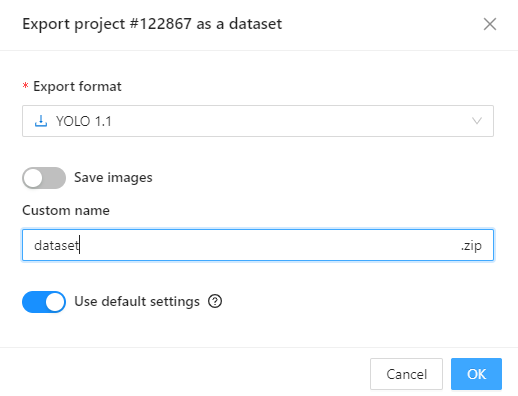  
В бесплатной онлайн-версии нельзя экспортировать датасет вместе с картинками, если используется эта версия, картинки надо загружать отдельно. Если устанавливать cvat локально, такого ограничения нет.

Загрузите аннотации и картинки в одну папку и загрузите ее на google диск,туда же поместите файл с расширением '.names', экспортированный из cvat ранее вместе с аннотациями.  


In [ ]:
dataset_path = 'dz2' # Укажите свой путь до датасета

Разобьем датасет на тестовую и обучающую выборки

In [ ]:
test_size = 0.2 # размер тестовой выборки
valid_size = 0.1 # размер валидационной выборки

In [ ]:
image_files = [f for f in os.listdir(dataset_path) if f.endswith('.jpg')]
annotation_files = [f for f in os.listdir(dataset_path) if f.endswith('.txt')]

image_files_with_annotations = [f for f in image_files if f.replace('.jpg', '.txt') in annotation_files]

train_files, test_files = train_test_split(image_files_with_annotations, test_size=test_size, random_state=42)
train_files, valid_files = train_test_split(train_files, test_size=len(image_files_with_annotations)*valid_size/len(train_files), random_state=42)

def copy_files(files, source_path, dest_path):
    for file in files:
        shutil.copy(os.path.join(source_path, file), os.path.join(dest_path, 'images'))
        shutil.copy(os.path.join(source_path, file.replace('.jpg', '.txt')), os.path.join(dest_path, 'labels'))

for folder in ['train', 'valid', 'test']:
    os.makedirs(os.path.join(dataset_path, folder, 'images'), exist_ok=True)
    os.makedirs(os.path.join(dataset_path, folder, 'labels'), exist_ok=True)

copy_files(train_files, dataset_path, os.path.join(dataset_path, 'train'))
copy_files(valid_files, dataset_path, os.path.join(dataset_path, 'valid'))
copy_files(test_files, dataset_path, os.path.join(dataset_path, 'test'))

for file in os.listdir(dataset_path):
    if not file.endswith('.names') and os.path.isfile(os.path.join(dataset_path, file)):
      os.remove(os.path.join(dataset_path, file))

Добавим конфиг к YOLO

In [ ]:
train_path = f'{dataset_path}/train/images'
val_path = f'{dataset_path}/valid/images'
test_path = f'{dataset_path}/test/images'

names_file = os.path.join(dataset_path, 'obj.names')
with open(names_file, 'r') as file:
    class_names = [line.strip() for line in file.readlines()]

num_classes = len(class_names)

data = {
    'train': train_path,
    'val': val_path,
    'test': test_path,
    'nc': num_classes,
    'names': class_names
}

output_file = os.path.join(dataset_path, 'data.yaml')
with open(output_file, 'w') as file:
    documents = yaml.dump(data, file)

os.remove(os.path.join(dataset_path, 'obj.names'))

# **3. Запуск обучения**

# 3.1 Архитектура сети


In [ ]:
# %cd /content/gdrive/MyDrive/yolov7

In [ ]:
%%bash
wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt
# wget -P /content/gdrive/MyDrive/yolov7 https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7x.pt
# wget -P /content/gdrive/MyDrive/yolov7 https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7-w6.pt
# wget -P /content/gdrive/MyDrive/yolov7 https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7-e6.pt
# wget -P /content/gdrive/MyDrive/yolov7 https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7-d6.pt
# wget -P /content/gdrive/MyDrive/yolov7 https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7-e6e.pt

In [ ]:
import sys
sys.path.append('yolov7')
weights = torch.load('yolov7.pt')
print(weights)

# 3.2 Начало обучения

[Чтобы получить полный список аргументов обучения, перейдите по ссылке](https://github.com/WongKinYiu/yolov7/blob/main/train.py)

Несколько важных аргументов, которые следует знать
- **configuration**: в основной папке yolov7 перейдите в папку cfg/training и выберите путь к соответствующему файлу конфигурации. Укажите относительный путь к файлу в аргументе **--cfg**.
- **data** путь к папке с данными, она будет обработана автоматически
- **weights** путь к предварительно обученным весам, заданный аргументом **--weights**


<br><br>

**Примечание по возобновлению обучения с контрольной точки** <br>
По умолчанию контрольные точки для эпохи хранятся в папке yolov7/runs/train, укажите относительный путь к контрольным точкам последней эпохи.

In [ ]:
# %cd yolov7
!python train.py --batch 16 --cfg cfg/training/yolov7.yaml --epochs 55 --data {dataset_path}/data.yaml --weights 'yolov7.pt' --device 0

Если после запуска у вас возникает такая ошибка:  
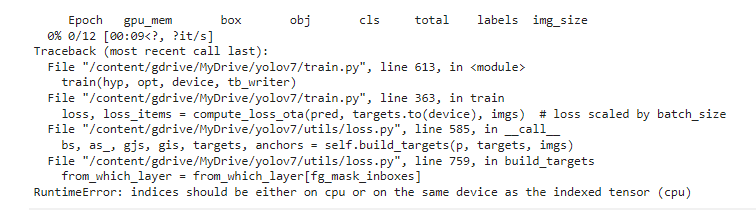  
то вам нужно заменить строку 685 в файле yolov7/utils/loss.py на  
```from_which_layer.append((torch.ones(size=(len(b),)) * i).to('cuda'))```  
и добавить следующую строку после 756 строки:  
```fg_mask_inboxes = fg_mask_inboxes.to(torch.device('cuda'))```  
Далее снова запускаем ячейку выше

# **4. Оценка**

- Обратите внимание, что контрольные точки тренировки по умолчанию сохраняются в файле run/train/exp. Пройдите путь к последней контрольной точке.

Мы можем оценить эффективность нашего индивидуального обучения, используя предоставленный сценарий оценки.

Обратите внимание, что мы можем настроить приведенные ниже пользовательские аргументы. Подробности см. в [аргументах, принимаемых detect.py](https://github.com/WongKinYiu/yolov7/blob/main/detect.py#L154).

# 4.1 F1 и Precision Recall кривые

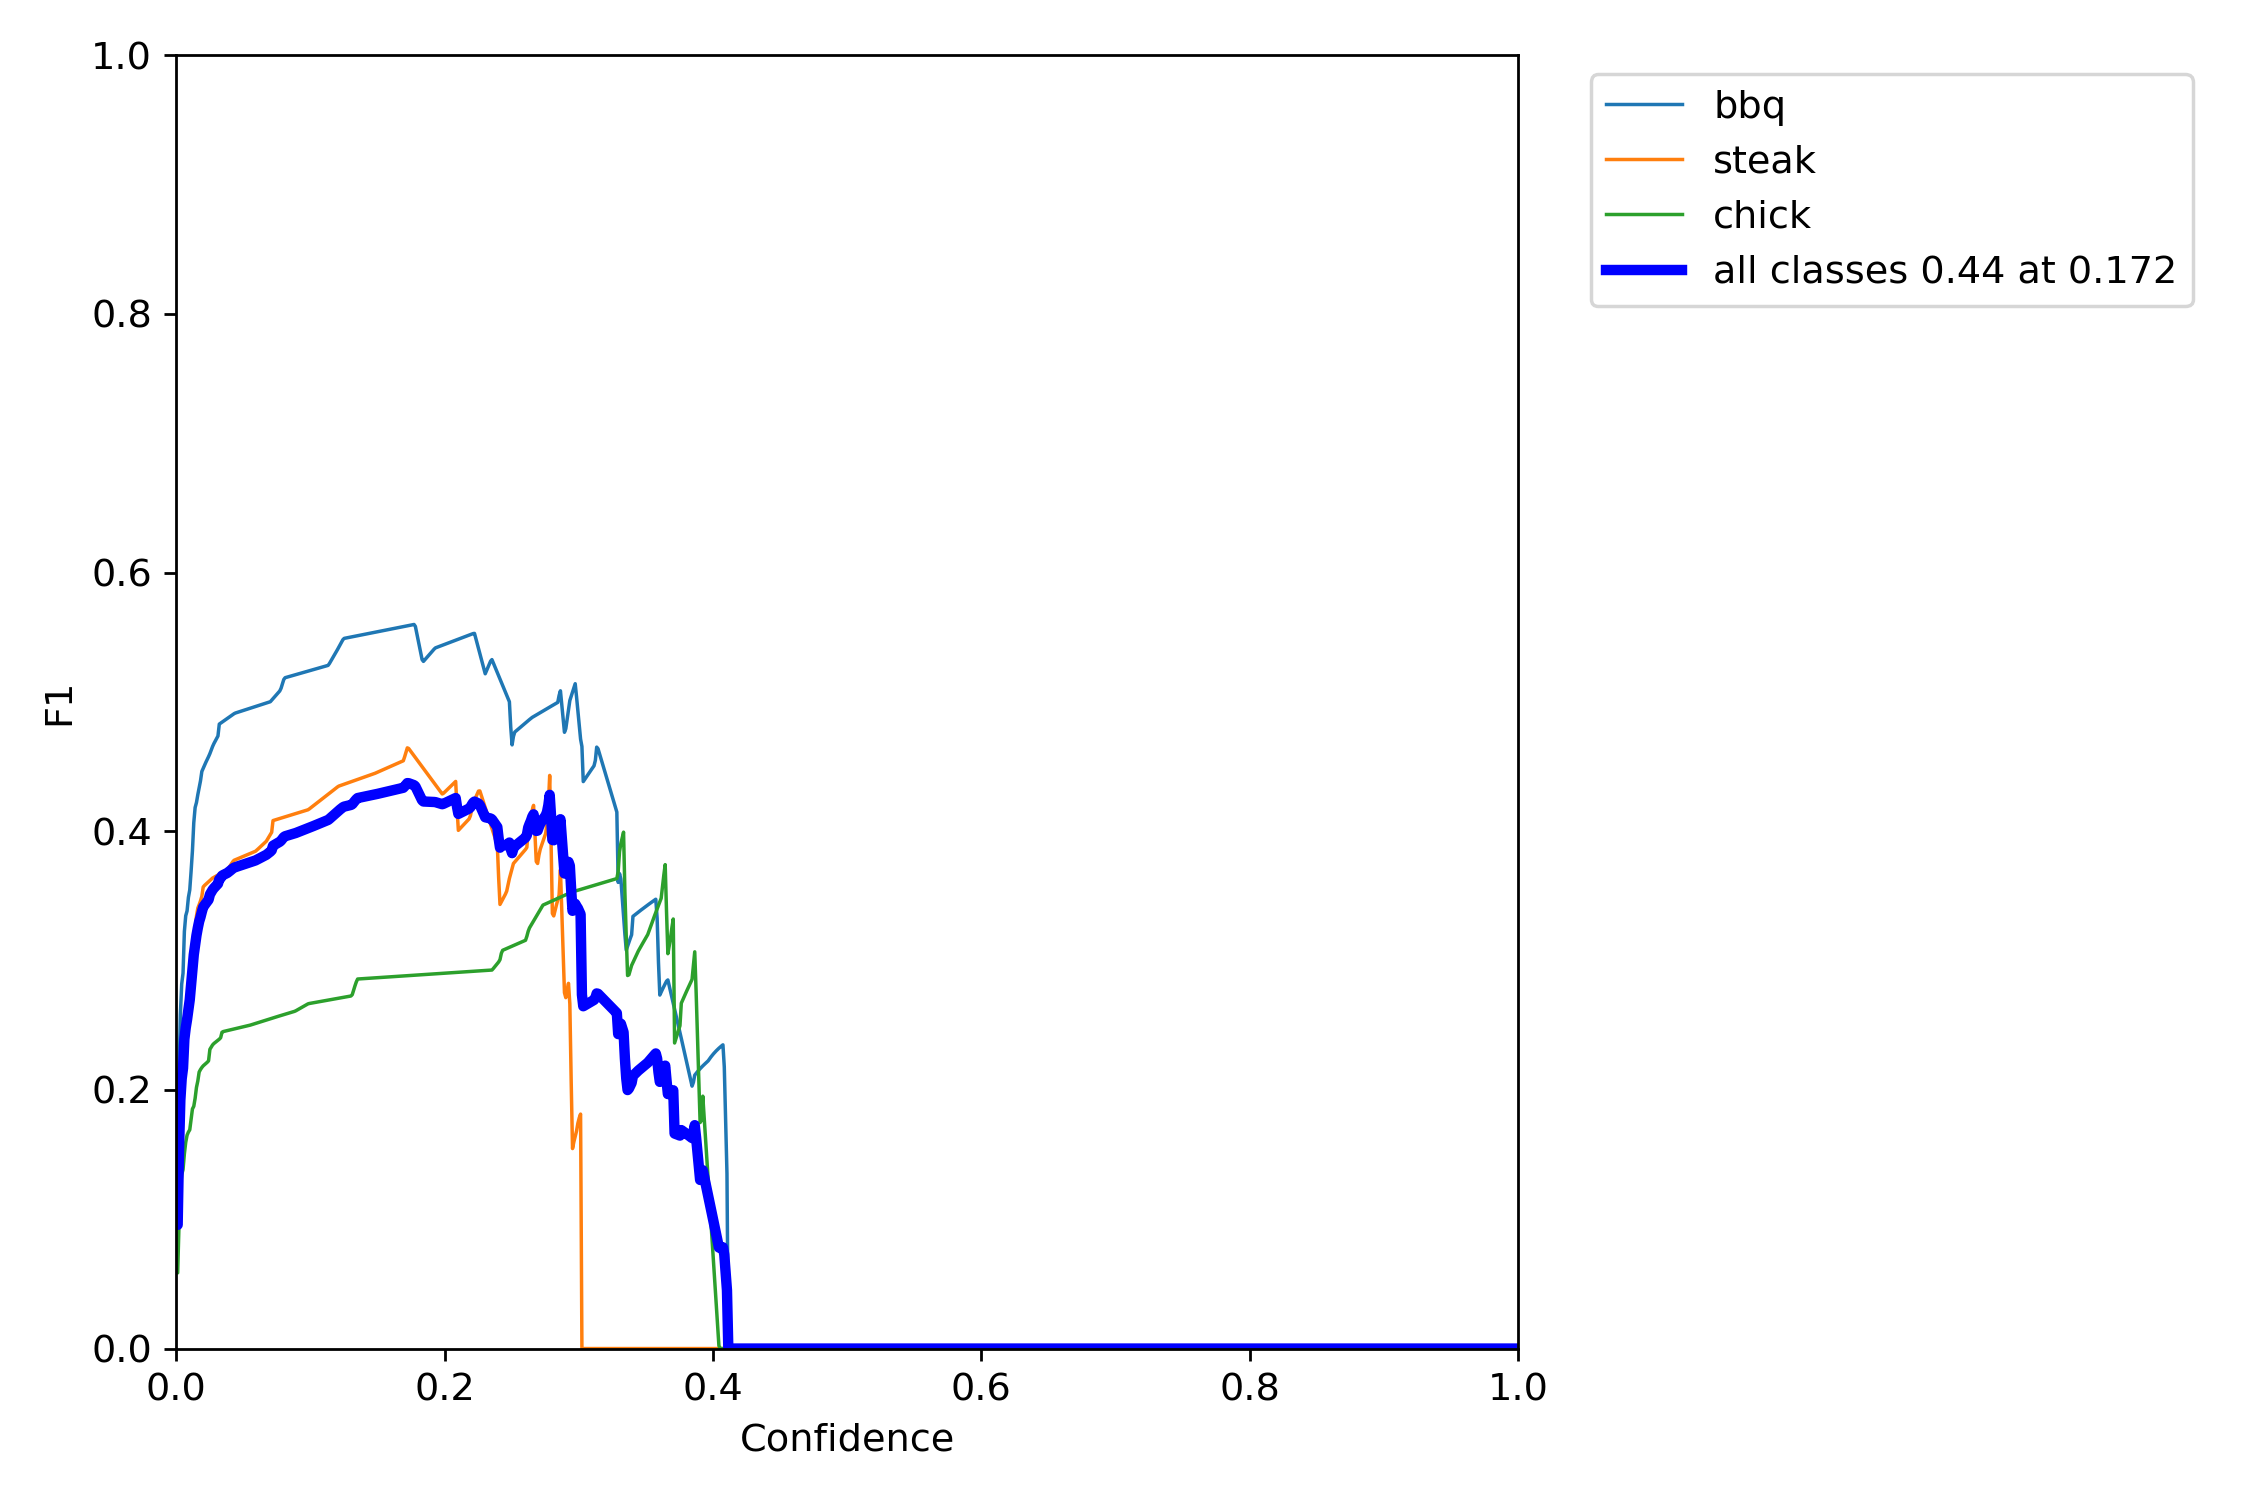

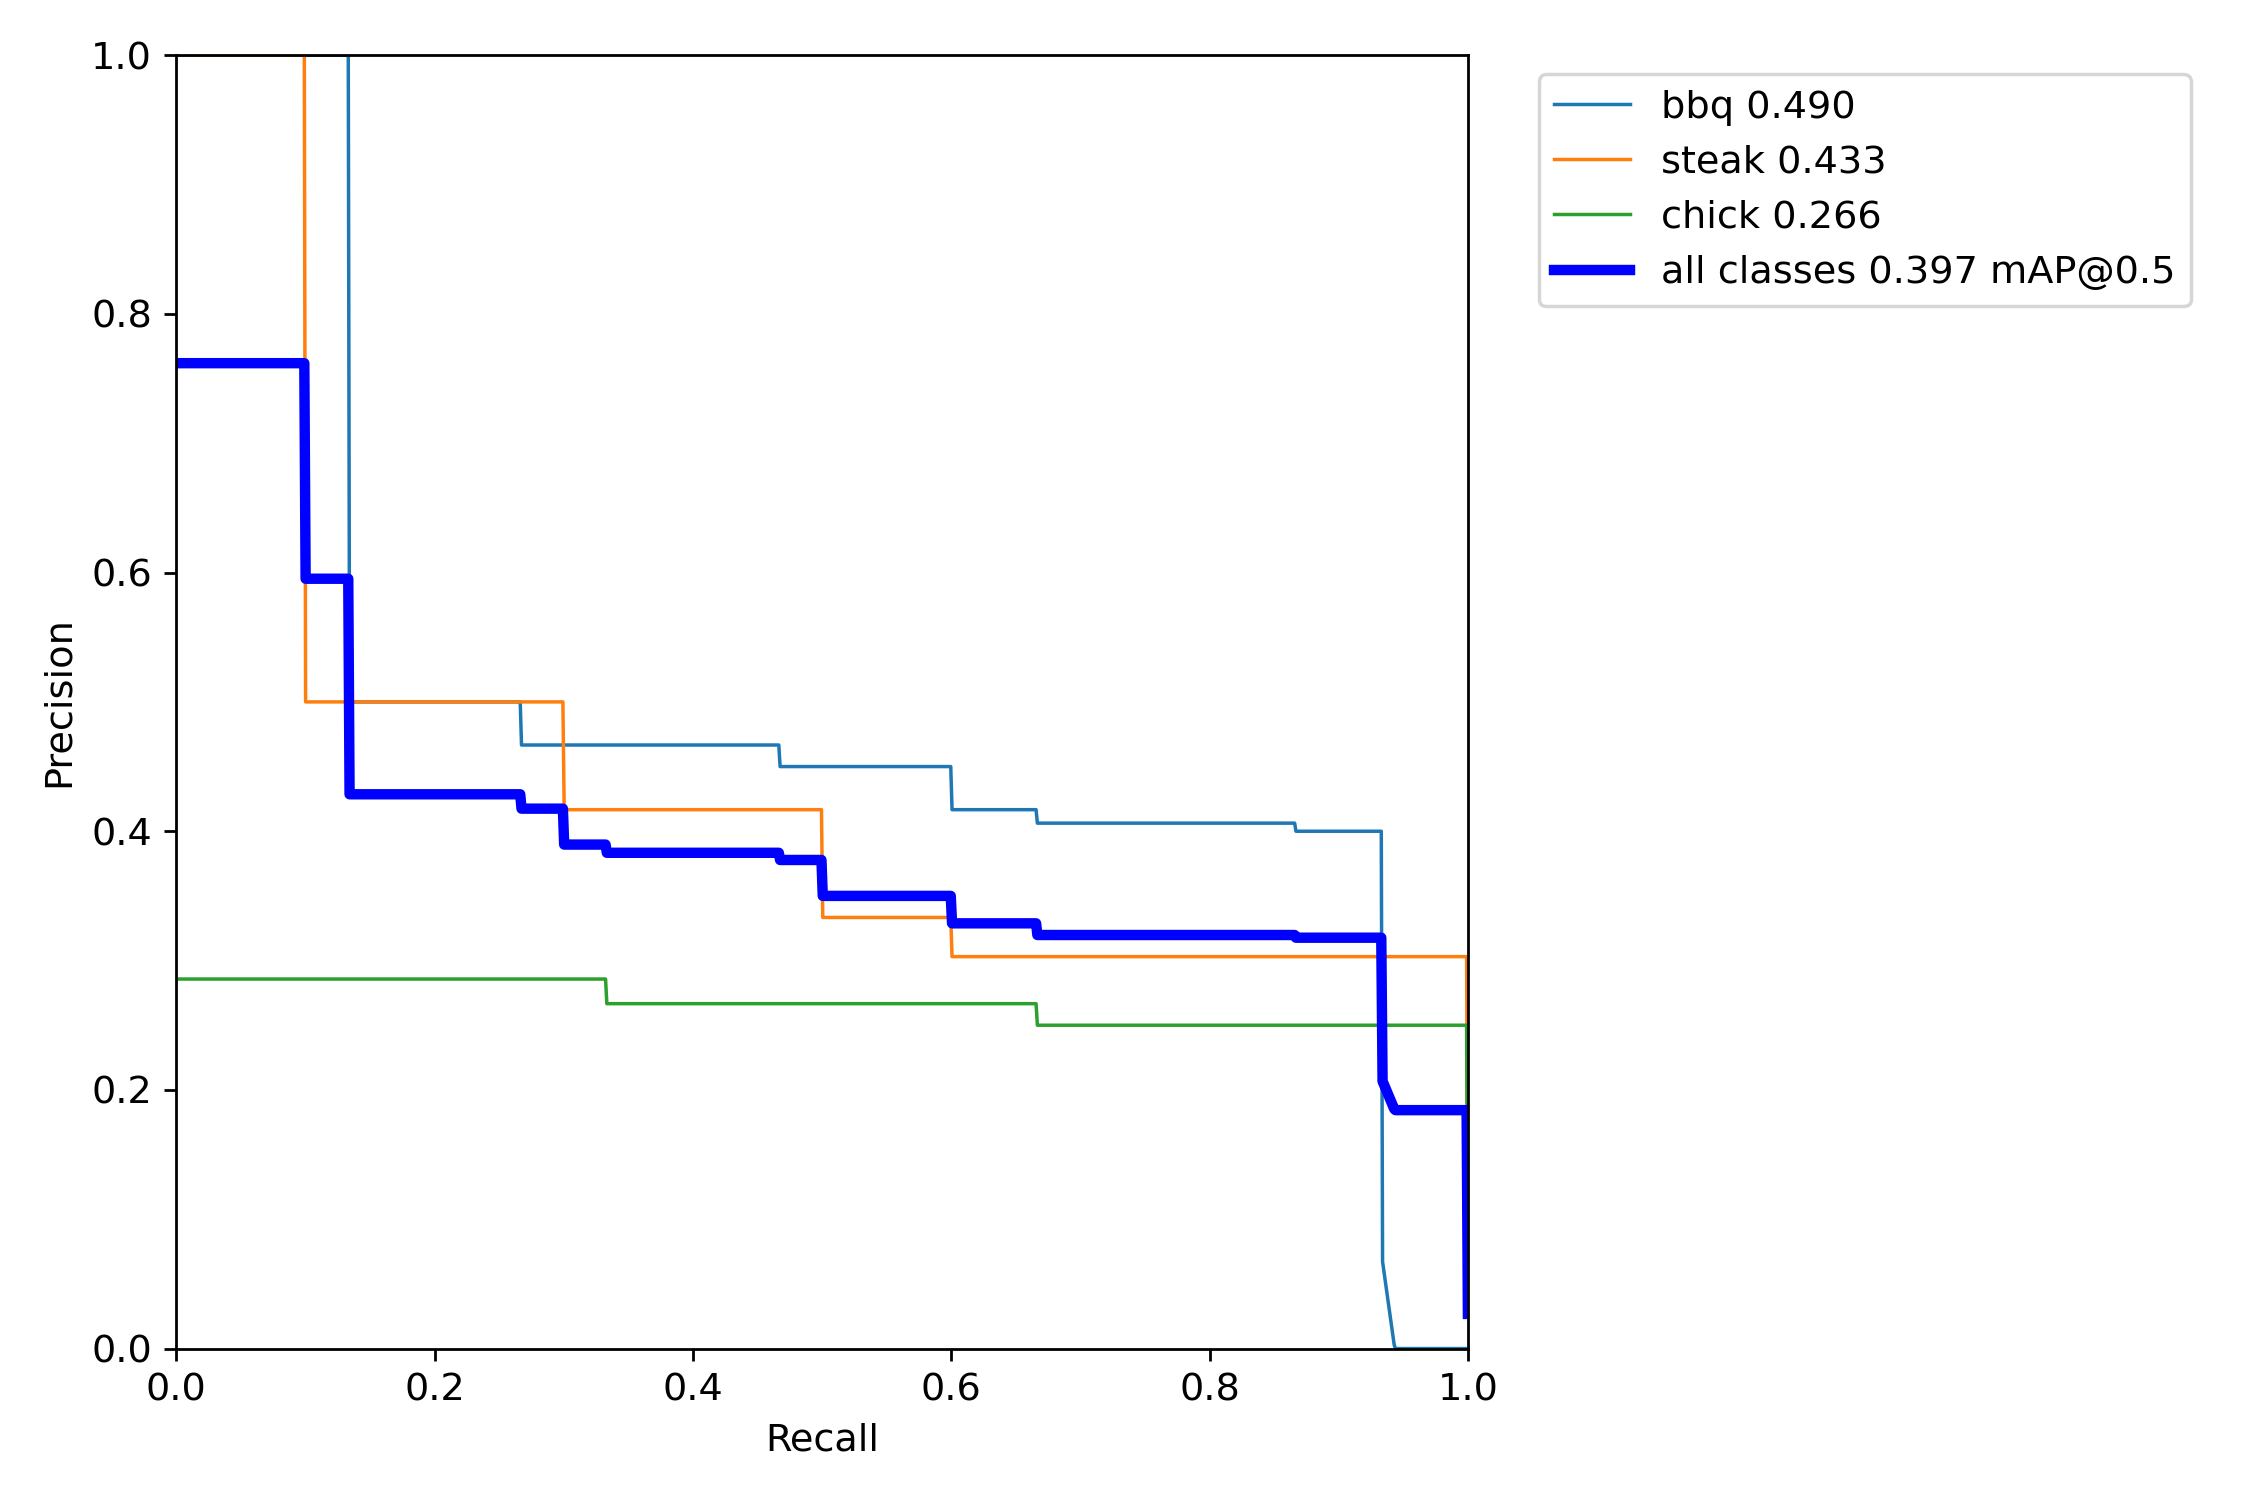

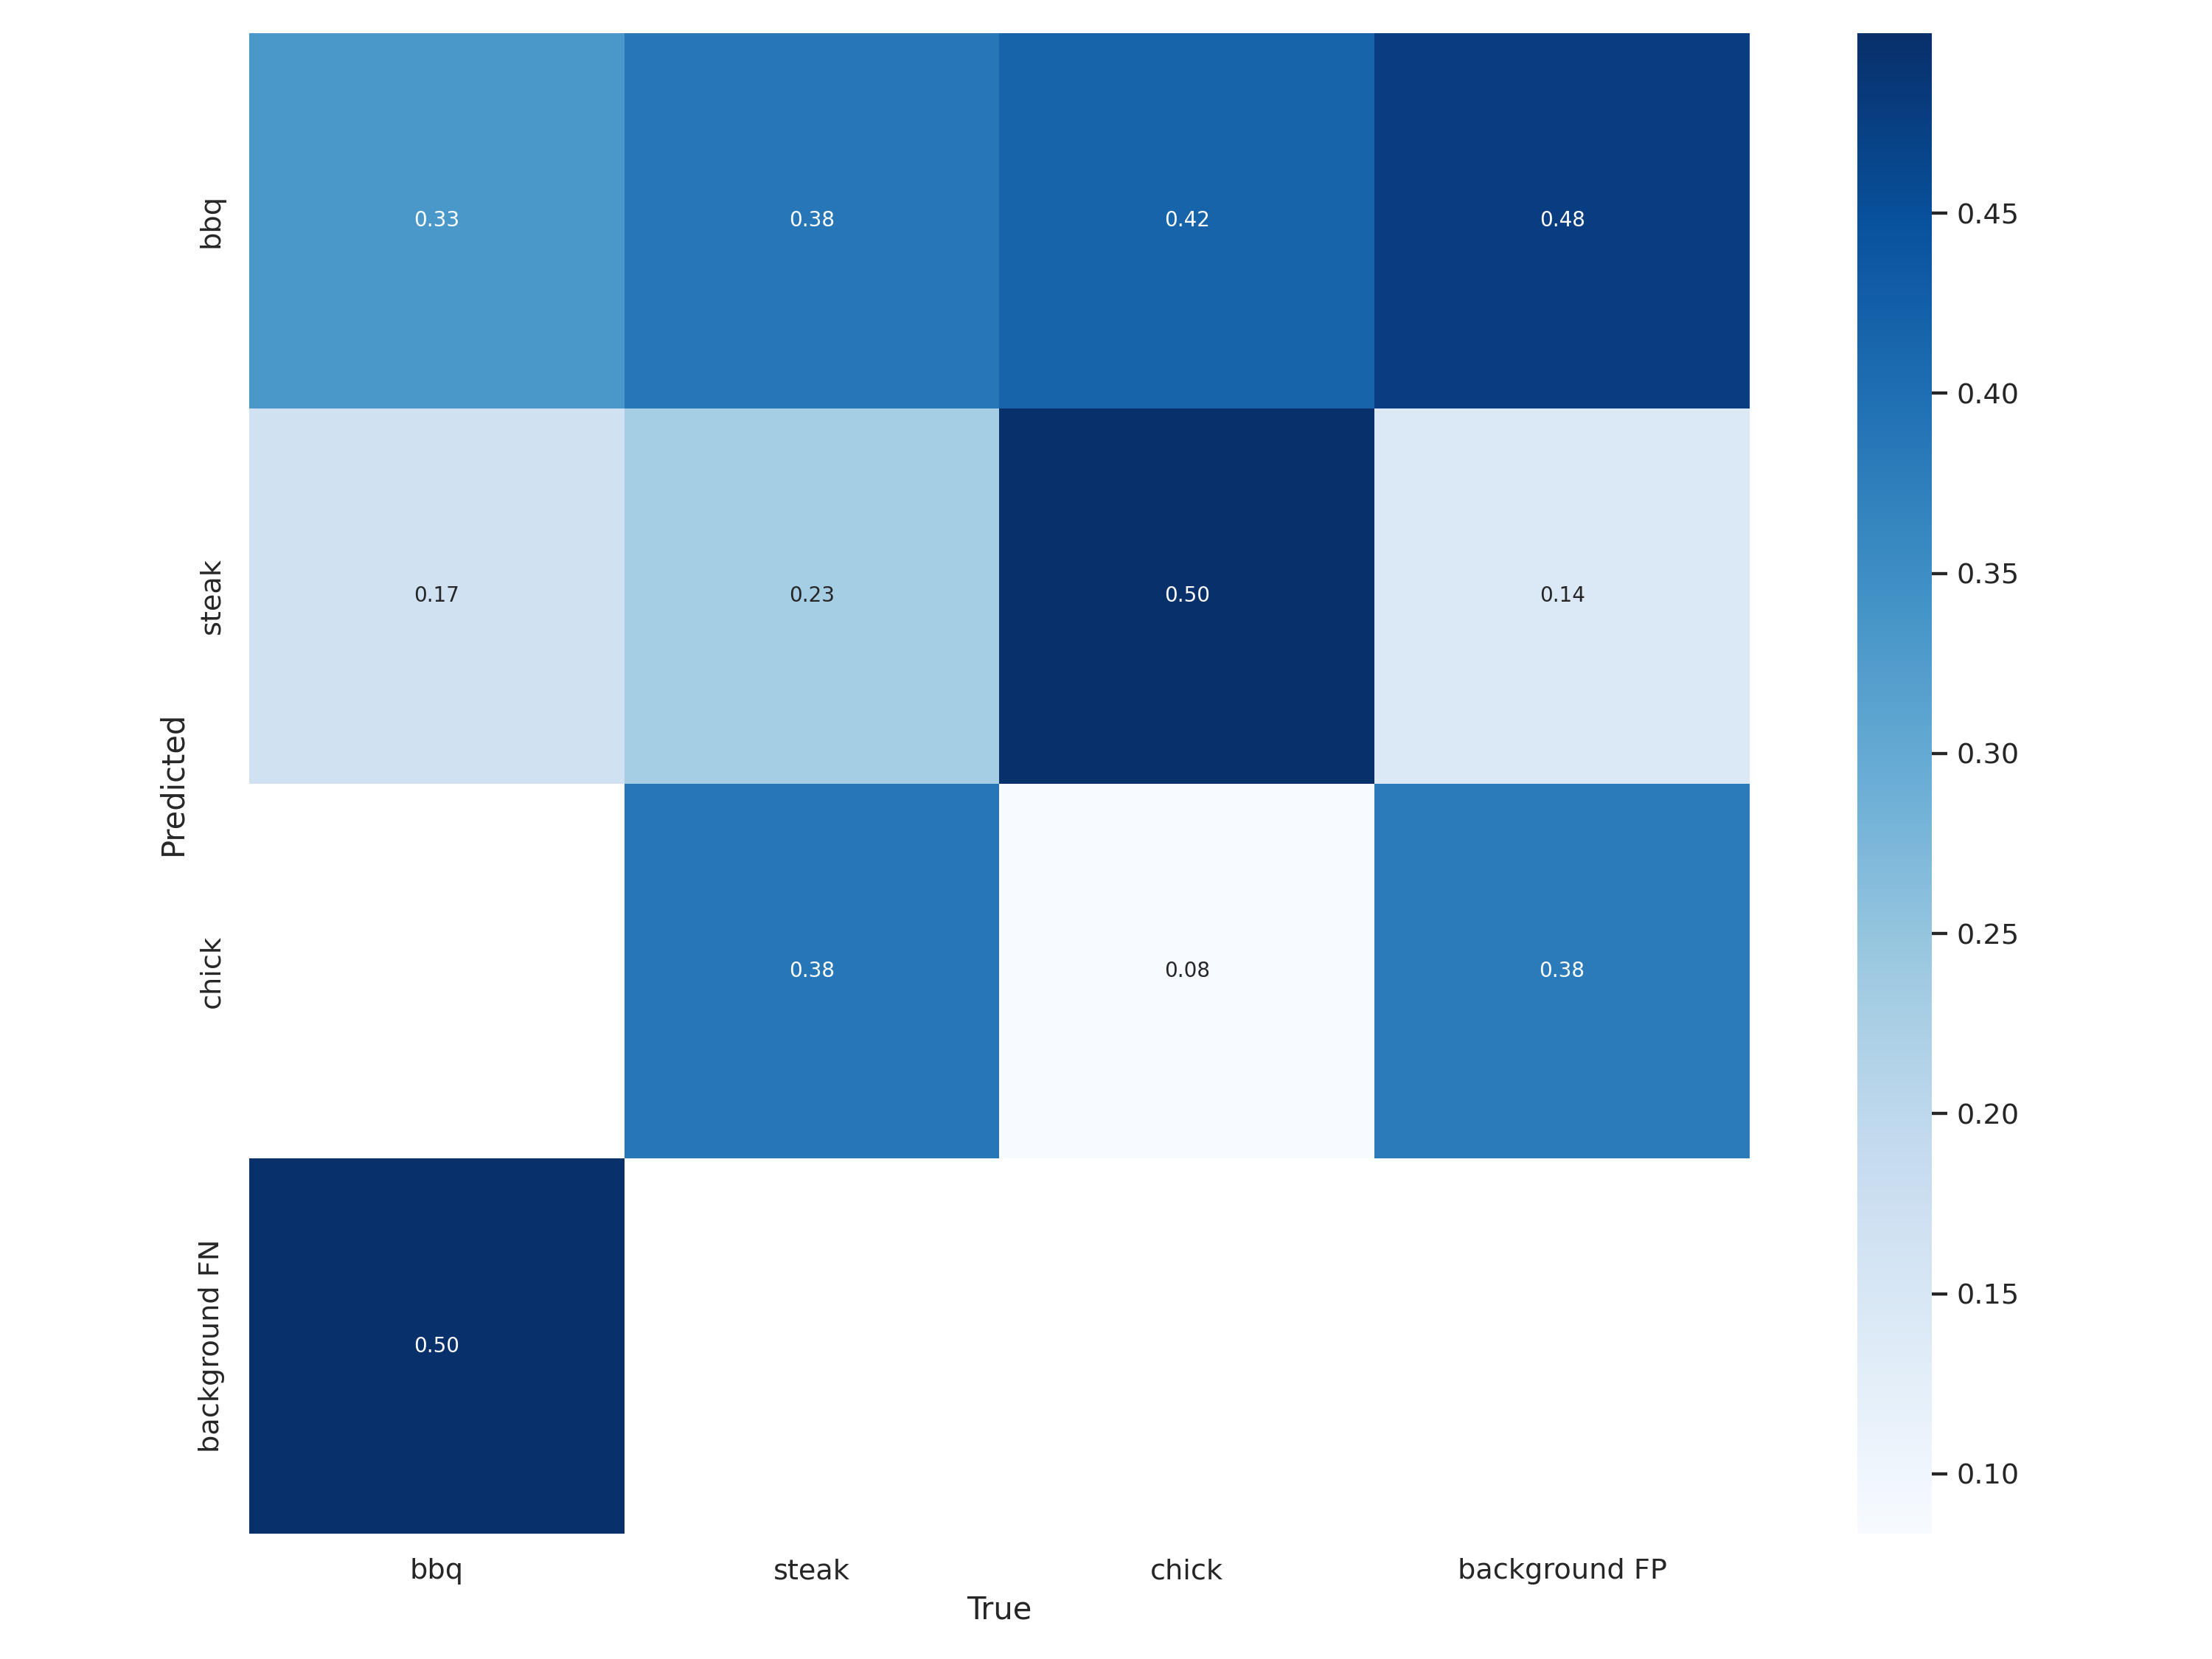

In [2]:
from IPython.display import Image
display(Image("runs/train/exp2/F1_curve.png", width=400, height=400))
display(Image("runs/train/exp2/PR_curve.png", width=400, height=400))
display(Image("runs/train/exp2/confusion_matrix.png", width=500, height=500))

# **4. Экспорт модели в onnx**

In [ ]:
%pip install onnx
%pip install onnxsim

In [1]:
!python export.py --weights ./runs/train/exp2/weights/best.pt \
        --grid --end2end --simplify \
        --topk-all 100 --iou-thres 0.45 --conf-thres 0.25 \
        --img-size 640 640 --max-wh 640

Import onnx_graphsurgeon failure: No module named 'onnx_graphsurgeon'
Namespace(batch_size=1, conf_thres=0.25, device='cpu', dynamic=False, dynamic_batch=False, end2end=True, fp16=False, grid=True, img_size=[640, 640], include_nms=False, int8=False, iou_thres=0.45, max_wh=640, simplify=True, topk_all=100, weights='./runs/train/exp2/weights/best.pt')
YOLOR 🚀 v0.1-104-g941b94c torch 2.3.1+cu121 CPU

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/home/ubuntu/miniforge3/envs/yolov7/lib/python3.8/site-packages/torch/functional.py:512: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3587.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36492560 parameters, 6194944 gradients, 103.2 GFLOPS

Starting TorchScript export with torch 2.3.1+cu121...
/home/ubuntu/phc/yo

В папке yolov7/runs/train/exp/weights/ должен был появиться файл best.onnx